# Sound activity

**Name:** Student

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import seaborn as sns

# Find your project directory

1. On the left edge of this notebook you will see five icons, click on the folder 📁 icon

2. Click on the arrow next to the **drive** folder, and then on the arrow next to **MyDrive**, you will see something similar to this:

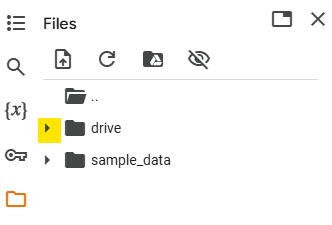

------------
------------

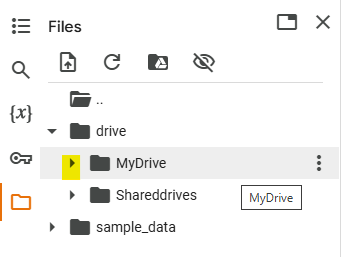

3. Within **MyDrive** locate your folder for this class:
For example:

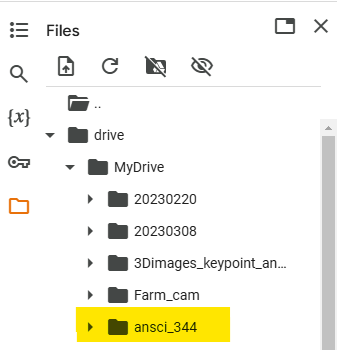

4. Left click and select **copy path**

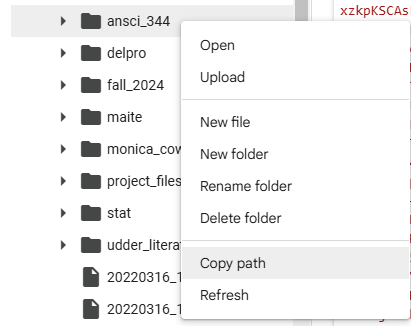

5. Paste your path in the cell bellow next to **notebook_path**, make sure that the path is between quotation marks.
For example:

  1.
  ```
  # this notebook directory
  notebook_path = '<paste path here>'
  ```
  2.
  ```
  # this notebook directory
  notebook_path = '/content/drive/MyDrive/ansci_344'
  ```



In [ ]:
# this notebook directory
notebook_path = '/content/drive/MyDrive/ansci_344'
# your sound directory
sound_files = 'sound_files'
# ouput directory
sound_plots = 'sound_plots'

directory = os.path.join(notebook_path, sound_files)
output_dir = os.path.join(notebook_path, sound_plots)
if not os.path.exists(output_dir):
  os.mkdir(output_dir)
# ----------
assert os.path.exists(notebook_path), f"The notebook_path: <{notebook_path}> does not exist\nverify that the path is correct"
assert os.path.exists(directory), f"The audio files location: <{directory}> does not exist\nverify that the path is correct"
assert len(os.listdir(directory)) > 0, f"The <{sound_files}> folder is empty, make sure that you have uploaded your files"
print("Perfect!")

Perfect!


# Load audio files

In [ ]:
#Importing all audio files and storing in a list of arrays
files = [os.path.join(directory, filename) for filename in os.listdir(directory) if filename.endswith(".wav")]
audio_filenames = [filename.replace(".wav", "") for filename in os.listdir(directory) if filename.endswith(".wav")]
audiodata = []

# sr = 44100
for filename in files:
    y , sr = librosa.load(filename, sr = None)
    sr = librosa.get_samplerate(filename)
    print(sr)
    audiodata.append(y)

print(f'You have successfully loaled {len(files)} sound files!')
print(audio_filenames)

11025
22050
8000
11025
11025
16000
11025
16000
16000
16000
You have successfully loaled 10 sound files!
['sheep_sound_885', 'sheep_sound_562', 'sheep_sound_683', 'sheep_sound_401', 'sheep_sound_724', 'horse_sound_071', 'horse_sound_354', 'horse_sound_855', 'horse_sound_112', 'horse_sound_213']


In [ ]:
import wave

data = wave.open(filename, mode = 'rb')
params = data.getparams()
print(params)

_wave_params(nchannels=2, sampwidth=1, framerate=16000, nframes=40277, comptype='NONE', compname='not compressed')


# Sound file features
Practice calculating the size of the sound file in bytes

1 byte = 8 bits

total bits = (sampling rate) * (duration) * (# channels) * (format)

Hint: set **print_size** as True to check your answers

```
print_size = True
```

In [15]:
print_size = True
for i, filename in enumerate(files):
  print(f"\nFile name: {audio_filenames[i]}")
  data = wave.open(filename, mode = 'rb')
  params = data.getparams()
  print(params)
  # print(f"\nFile name: {audio_filenames[i]}")
  # # sampling rate
  # print(f'Sampling rate: {sr}')

  # # Array size
  # print(f"Array size: {audiodata[i].shape}")

  # # Array size
  # print(f"Format: {type(audiodata[i][0])}")

  # duration
  duration = librosa.get_duration(y=audiodata[i], sr=sr)
  print(f"Duration: {duration:.4}")
  if print_size:
    # File size
    file_size = os.path.getsize(files[i])
    print(f"File size: {file_size} bytes")


File name: sheep_sound_885
_wave_params(nchannels=1, sampwidth=1, framerate=11025, nframes=47188, comptype='NONE', compname='not compressed')
Duration: 2.949
File size: 47232 bytes

File name: sheep_sound_562
_wave_params(nchannels=1, sampwidth=1, framerate=22050, nframes=28632, comptype='NONE', compname='not compressed')
Duration: 1.79
File size: 28676 bytes

File name: sheep_sound_683
_wave_params(nchannels=1, sampwidth=1, framerate=8000, nframes=66602, comptype='NONE', compname='not compressed')
Duration: 4.163
File size: 66728 bytes

File name: sheep_sound_401
_wave_params(nchannels=1, sampwidth=1, framerate=11025, nframes=16880, comptype='NONE', compname='not compressed')
Duration: 1.055
File size: 16924 bytes

File name: sheep_sound_724
_wave_params(nchannels=1, sampwidth=2, framerate=11025, nframes=11616, comptype='NONE', compname='not compressed')
Duration: 0.726
File size: 23276 bytes

File name: horse_sound_071
_wave_params(nchannels=1, sampwidth=1, framerate=16000, nframes=

# Play audio

In [ ]:
#play a single audio data
from IPython.display import Audio
Audio(data=audiodata[0], autoplay=True, rate=sr)

# Sound visualization

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(18, 10))
for index in range(10):

   if index <= 4:
    i = 0
    j = index
   else:
    i = 1
    j = index - 5

   librosa.display.waveshow(audiodata[index], sr=sr, ax = ax[i,j])  # put waveform in row i, column j
   ax[i,j].set(title=audio_filenames[index])

fig.savefig(os.path.join(output_dir, "audio_plot.png"))
plt.show()

## Plot Spectrogram for all observations

In [ ]:
#Plot Spectrogram for all observations
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for index in range(10):
   if index <= 4:
    i = 0
    j = index
   else:
    i = 1
    j = index - 5
   D = librosa.stft(audiodata[index], n_fft=2048)  # STFT of y
   S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
   librosa.display.specshow(S_db, x_axis='time', y_axis='linear',ax=ax[i,j], sr = sr)
   ax[i,j].set(title=audio_filenames[index])

fig.savefig(os.path.join(output_dir, "spectrogram_plot.png"))
plt.show()

## Plot Mel Spectrogram for all observations

In [ ]:
#Plot Mel Spectrogram for all observations
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for index in range(10):
   if index <= 4:
    i = 0
    j = index
   else:
    i = 1
    j = index - 5
   S = librosa.feature.melspectrogram(y=audiodata[index], sr=sr, n_mels=128,fmax=8000)
   S_dB = librosa.power_to_db(S, ref=np.max)
   librosa.display.specshow(S_dB, x_axis='time', y_axis='mel',ax=ax[i,j], sr = sr)
   ax[i,j].set(title=audio_filenames[index])

fig.savefig(os.path.join(output_dir, "mel_spectrogram_plot.png"))
plt.show()

## Plot Onset strength for all observations

In [ ]:
#Plot Onset strength for all observations
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for index in range(10):
   if index <= 4:
    i = 0
    j = index
   else:
    i = 1
    j = index - 5
   D = np.abs(librosa.stft(audiodata[index]))
   times = librosa.times_like(D,sr = sr)
   onset_env = librosa.onset.onset_strength(y=audiodata[index], sr=sr)
   ax[i,j].plot(times, onset_env / onset_env.max() , alpha=0.8,
           label='Mean (mel)')
   ax[i,j].set(title=audio_filenames[index])
fig.savefig(os.path.join(output_dir, "onset_strengt_plot.png"))
plt.show()

#Feature extraction

In [ ]:
#Feature extraction
descri_dat = []
for i in range(10):
    vec = np.array([0.0]*10)
    y = np.array(audiodata[i])
    #----------------------------#
    #-- Statistical Features ----#
    #----------------------------#

    #Signal standard deviation
    m = y.std()
    vec[0] = m
    #Range
    ran = max(y) - min(y)
    vec[1] = ran
    #Kurtosis
    ku = scipy.stats.kurtosis (y)
    vec[2] = ku
    #Skewness
    skew = scipy.stats.skew (y)
    vec[3] = skew

    #----------------------------#
    #-- Time Domain Features ----#
    #----------------------------#

    # RMS
    rms = librosa.feature.rms(y=y)
    vec[4] = np.mean(rms)

    #Zero-crossing rate
    zc = librosa.zero_crossings(y=y, pad=False)
    zc = sum(zc)/len(y) #standardized by the file length
    vec[5] = zc

    #-----------------------------#
    #-- Frequency Domain Features #
    #-----------------------------#

    # Average spectral centroid
    sc = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    msc = np.mean(sc)
    vec[6] = msc

    # Average spectral bandwidth
    spec_band = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr)[0]
    spec_band = sum(spec_band)/len(spec_band)
    vec[7] = spec_band

    #Mean Onset strenght
    onset_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median)
    oset = np.sum(onset_env)/len(onset_env)
    vec[8] = oset

    #Number of Peaks
    n_ons = len(librosa.onset.onset_detect(y=y, sr=sr, onset_envelope = onset_env))
    n_ons = n_ons/len(onset_env)
    vec[9] = n_ons
    descri_dat.append(vec)

dat = pd.DataFrame(descri_dat)
dat['filenames'] = audio_filenames #assign the respective filename to the features
#lets change the column names of the dataset
dat.columns = ['std',
               'range',
               'ku',
               'skew',
               'rms',
               'ZCR',
               'spec_cent',
               'spec_band',
               'OS',
               'peaks',
               'filename'
               ]
dat

## Assign labels


In [ ]:
label = ['none']*len(files)
label = [name.split("_")[0] for name in dat.filename]
print (label)

dat['label'] = label
dat

## Plot features according to the label

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))
fig.suptitle('Boxplots for the features according to the label')
for index in range(10):
   if index <= 4:
    i = 0
    j = index
   else:
    i = 1
    j = index - 5
   sns.boxplot(x='label', y=dat.columns[index], data=dat, ax=ax[i,j])

fig.savefig(os.path.join(output_dir, "features_labels_plot.png"))
plt.show()